### IDs:
Insert yours IDs to the cell below

ID #1: 204879100

ID #2: 305674731


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

# Imports

In [1]:
from scipy.stats import nbinom
from scipy.stats import binom
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import multinomial
import scipy.special
from collections import Counter

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

### Solution:

To determine the number of samples needed to have at least an 85% probability of finding at least one defective product, when each product has a 3% chance of being defective, we used the negative binomial distribution.

The formula for the negative binomial distribution is:
$$P(X=k) = \binom{k-1}{r-1}p^{r}(1-p)^{k-r}$$

Where:

$P(X=k)$ is the probability of getting the r-th failure on the k-th trial.

$p$ is the probability of failure (3% or 0.03 this case).

$r$ is the number of failures (1 in this case, since we want at least one defective product).

$k$ is the total number of trials.

Let's write a function to calculate this:

In [2]:
def dynamic_samples_needed(prob_failure, desired_probability, num_failures):
    """
    Calculate the number of samples needed to reach the desired probability of a certain number of failures.

    Parameters:
    prob_failure: The probability of failure (defective product).
    desired_probability: The desired cumulative probability of having the specified number of failures.
    num_failures: The required number of failures (defective products).

    Returns:
    int: The number of samples needed.
    """
    k = num_failures  # start with the minimum number of trials needed to observe the required failures
    while nbinom.cdf(k - num_failures, num_failures, prob_failure) < desired_probability:
        k += 1
    return k


In [3]:
samples_1 = dynamic_samples_needed(0.03,0.85,1)
print(f"We need {samples_1} independent samples to have at least an 85% probability of having at least one defective product in the batch")

We need 63 independent samples to have at least an 85% probability of having at least one defective product in the batch


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [4]:
# Using the 'dynamic_samples_needed' function with the new values according the question
samples_2 = dynamic_samples_needed(0.04, 0.95, 1)
samples_2

74

#### 1.C

Consider the following cases and calculate how many independent samples are required:

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [5]:
# Scenario 1: 10% defective, 90% probability, at least 5 defective products
samples_3 = dynamic_samples_needed(0.10, 0.90, 5)
samples_3


78

In [6]:
# Scenario 2: 30% defective, 90% probability, at least 15 defective products
samples_4 = dynamic_samples_needed(0.30, 0.90, 15)
samples_4


64

### Visualizations:

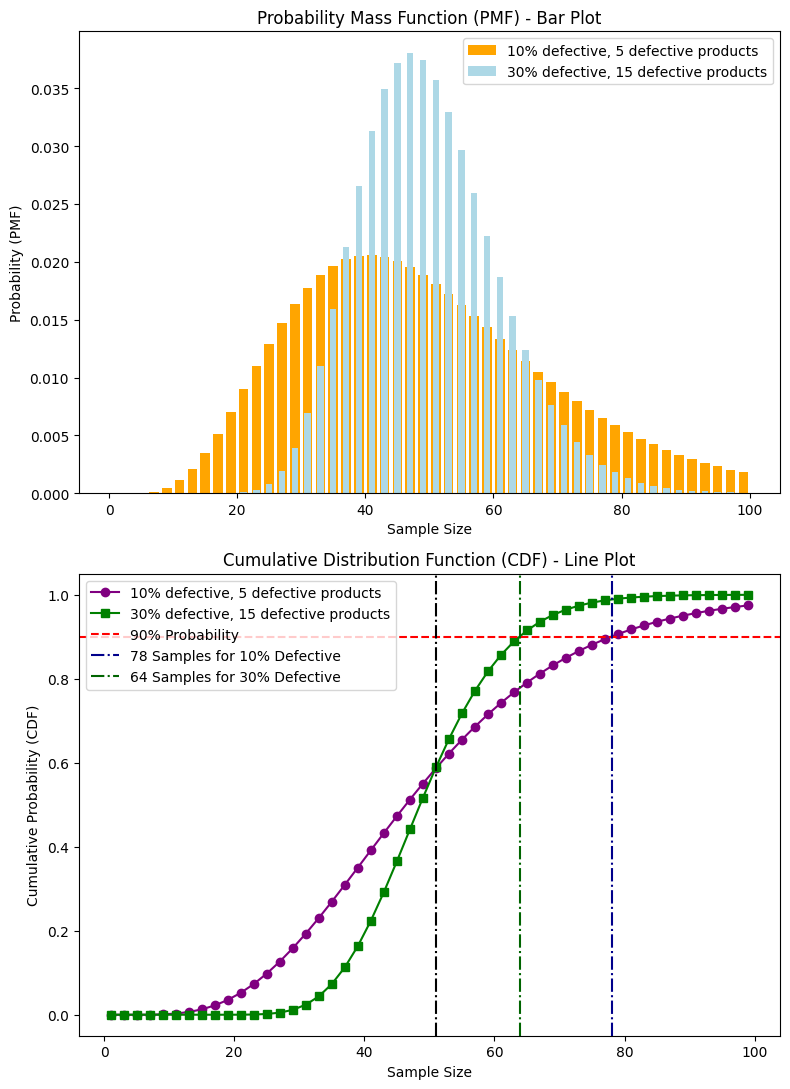

In [7]:
val_1 = stats.nbinom(n=5, p=.1, loc=5) # first case
val_2 = stats.nbinom(n=15, p=.3, loc=15) # second case
n = range(1, 100, 2)
# Bar plots for PMF
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 11))

# PMF as bar plots
axes[0].bar(n, val_1.pmf(n), width=1.5, color='orange', label='10% defective, 5 defective products')
axes[0].bar(n, val_2.pmf(n), width=1, color='lightblue', label='30% defective, 15 defective products')
axes[0].set_xlabel("Sample Size")
axes[0].set_ylabel("Probability (PMF)")
axes[0].set_title('Probability Mass Function (PMF) - Bar Plot')
axes[0].legend()

# Line plot for CDF with different style
axes[1].plot(n, val_1.cdf(n), 'o-', color='purple', label='10% defective, 5 defective products')
axes[1].plot(n, val_2.cdf(n), 's-', color='green', label='30% defective, 15 defective products')
axes[1].axhline(0.9, c='red', linestyle='--', label='90% Probability')
axes[1].axvline(78, c='darkblue', linestyle='-.', label='78 Samples for 10% Defective')  # Sample size for the first case
axes[1].axvline(64, c='darkgreen', linestyle='-.', label='64 Samples for 30% Defective')  # Sample size for the second case
axes[1].axvline(51, c='black', linestyle='-.')
axes[1].set_xlabel("Sample Size")
axes[1].set_ylabel("Cumulative Probability (CDF)")
axes[1].set_title('Cumulative Distribution Function (CDF) - Line Plot')
axes[1].legend()

plt.tight_layout()
plt.show()

###  Explanation:

In summary, the upper plot shows that smaller batches are more likely to contain only 5 defective items than 15, due to longer intervals between defects at lower failure rates. For a negative binomial distribution, the expected number of failures before $n$ successes is $\mu=n(1-p)/p$. Therefore, the expected batch size, $\mu_B=n/p$, equals 50 for both 10% failure probability with 5 defects ($\mu_{B1}=\dfrac{5}{0.1}=50$) and 30% failure probability with 15 defects ($\mu_{B2}=\dfrac{15}{0.3}=50$).

The variance of the distribution, $\sigma^2=n(1-p)/p^2$, differs in these scenarios: $\sigma_{B1}^2=450$ for the first case and $\sigma_{B2}^2=116.67$ for the second, making the latter distribution more concentrated.

The lower panel's Cumulative Distribution Function (CDF) demonstrates that the probability of a batch containing the required number of defects is reached sooner for the 15 defects, 30% failure rate case, which has a steeper CDF due to its lower variance. This indicates smaller batches are needed for a high probability (90% quantile) of containing 15 defects at a 30% failure rate.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br>

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.
Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

###  Explanation:
#### **IQR:**
The Interquartile Range is a measure of statistical dispersion that describes the range of values within which the middle 50% of the data falls.

When it is stated that "The IQR of the rent is smaller in SH than in RG," it means that the spread or variability of the rent values in Stochastic Heights (SH) is narrower compared to Random Grove (RG). In other words, the difference between the higher and lower rent values in the middle 50% of the data is smaller in SH than in RG.

In the context of the histograms we created, this statement suggests that the distribution of rent values for Stochastic Heights is more concentrated around the median (50th percentile) compared to the distribution in Random Grove. The histograms may appear more peaked or have less variability in SH compared to RG.

####  **Our Distribution:**
We will generate synthetic distribution.

We will create two arrays of random uniform values.

One array will contain values that are smaller than the specified median, while the other will contain values that are greater than the median.

In addition, we will create a Midpoint array with values around the median.

The function then will calculate an adjustment factor to ensure the generated distribution aligns with the desired mean.

This adjustment is applied to the largest elements in the distribution, allowing the mean to be controlled.

The resulting array is a synthetic distribution that is consistent survey findings.

In [8]:
# Given Data
population_sh = 16000
population_rg = 22000
mean_rent_sh = 6300
mean_rent_rg = 4200
median = 4600

In [9]:
# Function to get distribution with desired properties
def get_distribution(population, dist_max_val, mean, median, num_of_largest_elements):
    np.random.seed(42)
    half_size = (population // 2) - 1

    # Generate two arrays of size half_size, with random uniform values that are smaller than the median and that are greater than the median
    arr_smaller_values = np.random.uniform(0, median - 1, half_size)
    arr_greater_values = np.random.uniform(median + 1, dist_max_val, half_size)

    mid = [median - 1, median + 1]

    # Add twice the value of the specified median to the sum of all elements in arr_smaller_values and arr_greater_values
    sum_of_arrays_with_median = median * 2 + np.sum(arr_smaller_values + arr_greater_values)

    # We will adjust the largest elements to ensure the desired mean:
      # This entire expression represents the difference between the sum of the generated values and twice the median, subtracted by the product of the desired mean and the total population.
      # Then we divided  the result by the number of largest elements.
      # This division ensures that the adjustment factor will be applied to each of the largest elements to achieve the desired mean.
    adjustment_factor = (sum_of_arrays_with_median - (mean * population)) / num_of_largest_elements

    sorted_indices = np.argsort(arr_greater_values)
    arr_greater_values[sorted_indices[-num_of_largest_elements:]] -= adjustment_factor

    return np.concatenate((arr_smaller_values, mid, arr_greater_values))

In [10]:
# Function to get the IQR. The IQR is a measure of statistical dispersion, representing the range between the first quartile (Q1) and the third quartile (Q3) of the distribution.
def get_iqr(distribution):
    return round(np.percentile(distribution, 75) - np.percentile(distribution, 25), 2)

In [11]:
def display_values(sh_scenario, sh_distribution, rg_scenario, rg_distribution):
    print(f"Mean of {sh_scenario}:", np.mean(sh_distribution))
    print(f"Median of {sh_scenario}:", np.median(sh_distribution))
    print(f"Variance of {sh_scenario}:", round(np.var(sh_distribution), 2))
    print(f"IQR of {sh_scenario}:", get_iqr(sh_distribution))
    print()
    print(f"Mean of {rg_scenario}:", round(np.mean(rg_distribution), 2))
    print(f"Median of {rg_scenario}:", round(np.median(rg_distribution), 2))
    print(f"Variance of {rg_scenario}:", round(np.var(rg_distribution), 2))
    print(f"IQR of {rg_scenario}:", get_iqr(rg_distribution))

In [12]:
def display_distributions(scenario, sh_distribution, rg_distribution):
    # Plot histograms for 2A Scenarios
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"{scenario}:", fontsize=16)

    plt.subplot(1, 2, 1)
    plt.hist(sh_distribution, bins=np.arange(1000, 8000, 100), color='skyblue', edgecolor='black')
    plt.title(f'{scenario} - Stochastic Heights')
    plt.xlabel('Rent (in RCU)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(rg_distribution, bins=np.arange(1000, 8000, 100), color='orange', edgecolor='black')

    plt.title(f'{scenario} - Random Grove')
    plt.xlabel('Rent (in RCU)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


Mean of sh_scenario_1: 6300.0
Median of sh_scenario_1: 4600.0
Variance of sh_scenario_1: 52186653.33
IQR of sh_scenario_1: 3516.61

Mean of rg_scenario_1: 4200.0
Median of rg_scenario_1: 4600.0
Variance of rg_scenario_1: 4877501.22
IQR of rg_scenario_1: 4018.98


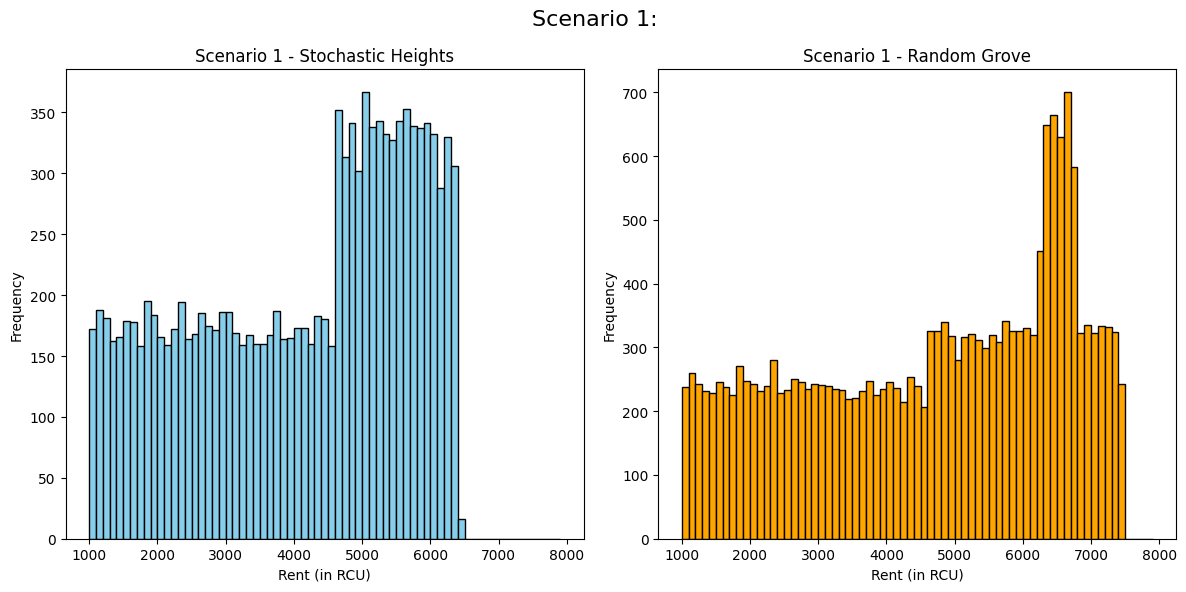

In [13]:
# Scenario 1:

dist_max_val_sh = 7000  # dist_max_val_sh will control IQR
num_of_largest_elements_sh = 2000
sh_distribution_1 = get_distribution(population_sh, dist_max_val_sh, mean_rent_sh, median, num_of_largest_elements_sh)

dist_max_val_rg = 8000   # dist_max_val_sh will control IQR
num_of_largest_elements_rg = 4000
rg_distribution_1 = get_distribution(population_rg, dist_max_val_rg, mean_rent_rg, median, num_of_largest_elements_rg)

display_values("sh_scenario_1", sh_distribution_1, "rg_scenario_1", rg_distribution_1)
display_distributions("Scenario 1", sh_distribution_1, rg_distribution_1)

Mean of sh_scenario_2: 6300.0
Median of sh_scenario_2: 4600.0
Variance of sh_scenario_2: 344862993.91
IQR of sh_scenario_2: 3023.15

Mean of rg_scenario_2: 4200.0
Median of rg_scenario_2: 4600.0
Variance of rg_scenario_2: 6883342.23
IQR of rg_scenario_2: 3546.78


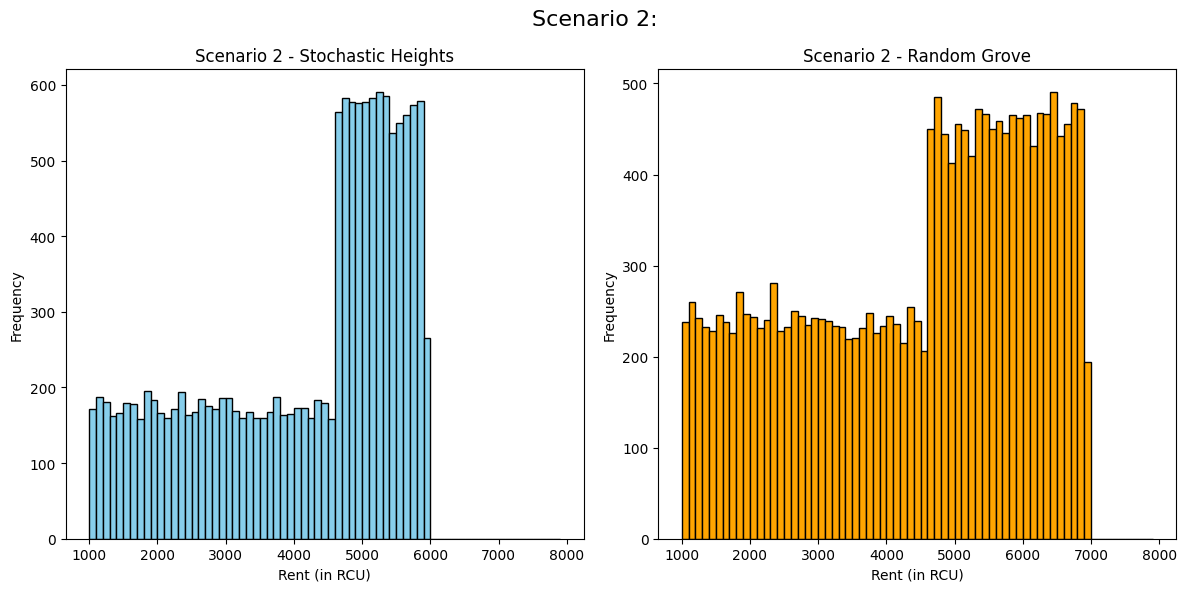

In [14]:
# Scenario 2

dist_max_val_sh = 6000  # dist_max_val_sh will control IQR
num_of_largest_elements_sh = 300
sh_distribution_2 = get_distribution(population_sh, dist_max_val_sh, mean_rent_sh, median, num_of_largest_elements_sh)

dist_max_val_rg = 7000   # dist_max_val_sh will control IQR
num_of_largest_elements_rg = 300
rg_distribution_2 = get_distribution(population_rg, dist_max_val_rg, mean_rent_rg, median, num_of_largest_elements_rg)

display_values("sh_scenario_2", sh_distribution_2, "rg_scenario_2", rg_distribution_2)
display_distributions("Scenario 2", sh_distribution_2, rg_distribution_2)

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

###  Explanation:
The variable num_of_largest_elements in our context represents the number of largest elements in an array from which a calculated difference (related to the mean) is subtracted.

When we subtract the difference from a larger number of the largest elements, it has a greater impact on the overall distribution.

Larger num_of_largest_elements implies that a substantial portion of the higher values is being adjusted, affecting the spread of the data and leading to a higher variance.

Mean of sh_scenario_3: 6300.0
Median of sh_scenario_3: 4600.0
Variance of sh_scenario_3: 52186653.33
IQR of sh_scenario_3: 3516.61

Mean of rg_scenario_3: 4200.0
Median of rg_scenario_3: 4600.0
Variance of rg_scenario_3: 6883342.23
IQR of rg_scenario_3: 3546.78


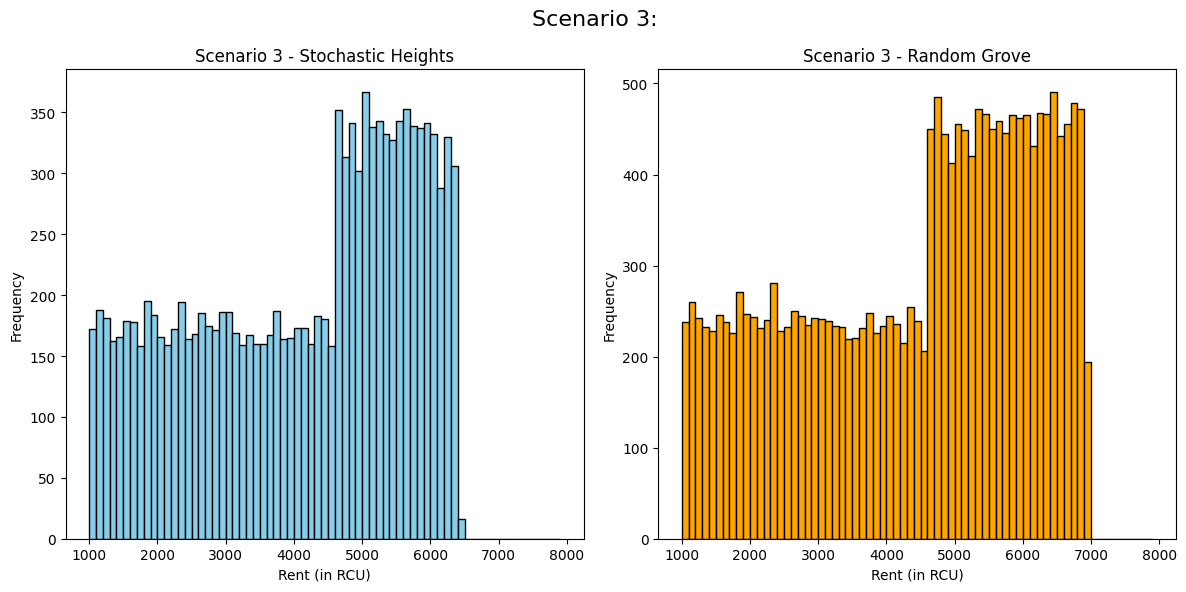

In [15]:
dist_max_val_sh = 7000  # max_val_sh will control IQR
num_of_largest_elements_sh = 2000  # num_of_largest_elements_sh will affect the variance
sh_distribution_3 = get_distribution(population_sh, dist_max_val_sh, mean_rent_sh, median, num_of_largest_elements_sh)

dist_max_val_rg = 7000   # max_val_sh will control IQR
num_of_largest_elements_rg = 300  # num_of_largest_elements_rg will affect the variance
rg_distribution_3 = get_distribution(population_rg, dist_max_val_rg, mean_rent_rg, median, num_of_largest_elements_rg)

display_values("sh_scenario_3", sh_distribution_3, "rg_scenario_3", rg_distribution_3)
display_distributions("Scenario 3", sh_distribution_3, rg_distribution_3)

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that $X$ is a vector of counts.


2. Consider the random variable $Y = X_2 + X_3 + X_4$.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to results from class and explain your observation.

In [16]:
np.random.seed(500)

In [17]:
# Given parameters
total_trials = 20
probabilities = [0.2, 0.1, 0.1, 0.1, 0.2, 0.3]
sample_size = 100

# Create the multinomial distribution and generate samples
X = multinomial(total_trials, probabilities)
multinomial_samples = X.rvs(size=sample_size)

In [18]:
Y_values = multinomial_samples[:, 1:4].sum(axis=1)

Based on the provided data, we know that:

$$X_{2},X_{3},X_{4}\sim Bin(20,0.1)$$

Therefore:

$$Y = X_{2} + X_{3} + X_{4} \sim B(20, p_{2} + p_{3} + p_{4})=Bin(20, 0.3)$$

In [19]:
Y_mean = Y_values.mean()
Y_mean

6.07

In [20]:
# Calculating the Empirical Centralized Third Moment
centralized_third_moment = ((Y_values - Y_mean)**3).mean()
centralized_third_moment

2.113985999999996

The centralized third moment for a binomial distribution is given by the expression:

$$\gamma ^3 = E\Bigg[\Bigg(\sum_{i=1}^{n} (X_i - p)\Bigg)^3 \Bigg]$$

And, after further simplification:

$$ \gamma ^3 = np(1-p)(1-2p) $$

Where $X_i$ is an indicator, stating whether the $i$'th trial is a success.

As a result, we get:

In [21]:
number_of_trials = 20
probability_of_success = 0.3
BTCM_value = number_of_trials * probability_of_success * (1 - probability_of_success) * (1 - 2 * probability_of_success)
BTCM_value

1.6799999999999997

Our 100 experiments yielded an empirical centralized third moment for 𝑌 that differs from the theoretical empirical third moment of the binomial distribution taught in class. This discrepancy arises because our empirical moment reflects the variability inherent in limited samples. In contrast, the theoretical moment represents the expected value in the case of infinite experimentation.

The empirical moments calculated from a finite number of experiments (like 100 in our case) are subject to sample variability and may not perfectly match the theoretical moments, which are based on the assumption of an infinite number of trials or observations.

Let's increase the number of repetitions (k) to a higher value and observe the outcome:

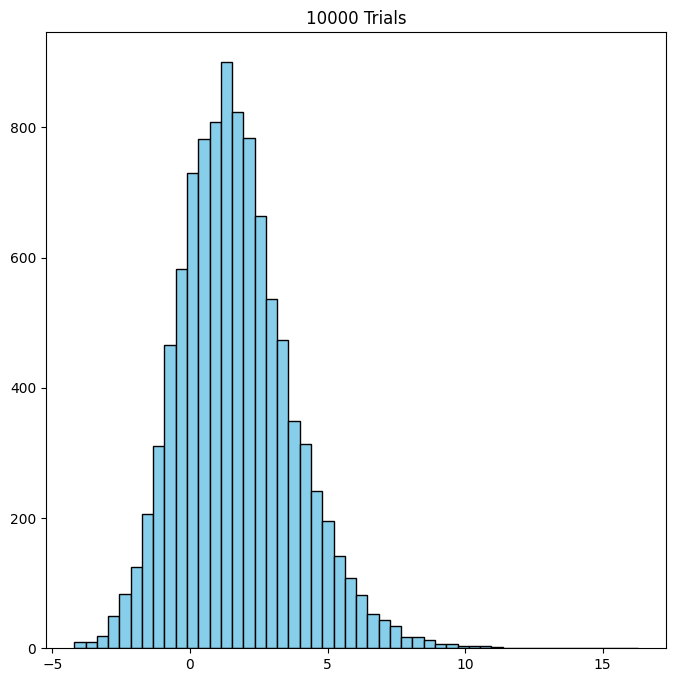

1.6730827980000003


In [22]:
Y_vals = []

for _ in range(10000):
    Y = X.rvs(sample_size)[:, 1:4]
    Y_sum = Y.sum(axis=1)
    empirical_third_moment = np.mean((Y_sum - Y_sum.mean()) ** 3)
    Y_vals.append(empirical_third_moment)

plt.figure(figsize=(8, 8))
plt.title("10000 Trials")
plt.hist(Y_vals, bins=50, color='skyblue', edgecolor='black')
plt.show()

print(np.mean(Y_vals))

The histogram shows that with numerous repetitions of the experiment, the results will increasingly align with the theoretical central third moment (1.679).

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

###  Explanation:
The NFoldConv program is a convolution operation that takes a probability distribution P and an integer n as input.

It repeatedly convolves the distribution with itself $(n-1)$ times, resulting in the distribution of the sum of n independent repeats of random variables, each with the original distribution P. The convolution operation is implemented in the convolve_dists function, which combines two distributions to produce a new distribution representing the sum of their random variables.*italicized text*

In [23]:
def convolve_dists(P_X, P_Y):
    result = Counter()
    for x, p_x in P_X.items():
        for y, p_y in P_Y.items():
            result[x + y] += p_x * p_y

    return result

In [24]:
def NFoldConv(P, n):
    Q = Counter(P)

    # Perform convolution n times
    for _ in range(1, n):
        Q = convolve_dists(Q, P)

    return Q

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 independent times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


###  Explanation:
We will compute and visualize the distribution of the sum of outcomes obtained by rolling a fair octahedron 17 independent times.

The distribution of a single roll is represented as a uniform distribution from 1 to 8.

The NFoldConv function will then calculate the distribution of the sum of 17 rolls, leveraging the convolution operation to combine the probabilities of different outcomes.

In [25]:
# The distribution of a single roll (uniform distribution from 1 to 8)
dist = Counter({i: 1/8 for i in range(1, 9)}) # {1: 0.125, 2: 0.125, 3: 0.125, 4: 0.125, 5: 0.125, 6: 0.125, 7: 0.125, 8: 0.125}
n_rolls = 17

sum_distribution = NFoldConv(dist, n_rolls)

print("The distribution of the sum of 17 independent rolls:", sum_distribution)

The distribution of the sum of 17 independent rolls: Counter({76: 0.04178625514552792, 77: 0.04178625514552792, 75: 0.041337257154996365, 78: 0.041337257154996365, 74: 0.0404533435000225, 79: 0.0404533435000225, 73: 0.03916196231819313, 80: 0.03916196231819313, 72: 0.03750254422783916, 81: 0.03750254422783916, 71: 0.03552454726152865, 82: 0.03552454726152865, 70: 0.033285062338742843, 83: 0.033285062338742843, 69: 0.030846137527832607, 84: 0.030846137527832607, 68: 0.028271992206021945, 85: 0.028271992206021945, 67: 0.025626291369178045, 86: 0.025626291369178045, 66: 0.022969636481963374, 87: 0.022969636481963374, 65: 0.02035740428456334, 88: 0.02035740428456334, 64: 0.017838031700777357, 89: 0.017838031700777357, 63: 0.015451806826463077, 90: 0.015451806826463077, 62: 0.013230186524219256, 91: 0.013230186524219256, 61: 0.011195623843158309, 92: 0.011195623843158309, 60: 0.009361856250110101, 93: 0.009361856250110101, 59: 0.007734580675745839, 94: 0.007734580675745839, 58: 0.0063124249

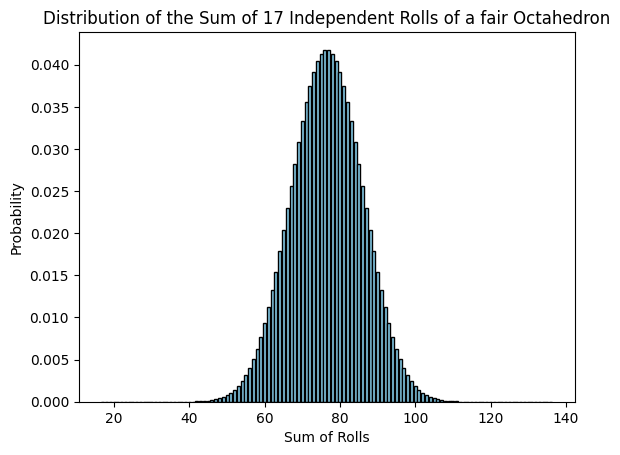

In [26]:
# Extract keys and values
sums = list(sum_distribution.keys()) # keys
probabilities = list(sum_distribution.values()) # values

# Plot the graph
plt.bar(sums, probabilities, color='skyblue', edgecolor='black')
plt.xlabel('Sum of Rolls')
plt.ylabel('Probability')
plt.title('Distribution of the Sum of 17 Independent Rolls of a fair Octahedron')

# Show the plot
plt.show()

### Question 5 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 5.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

**Solution:** The distribution is Binomial because each coin toss is independent with a constant success probability p, and we count the number of successes in n tosses.

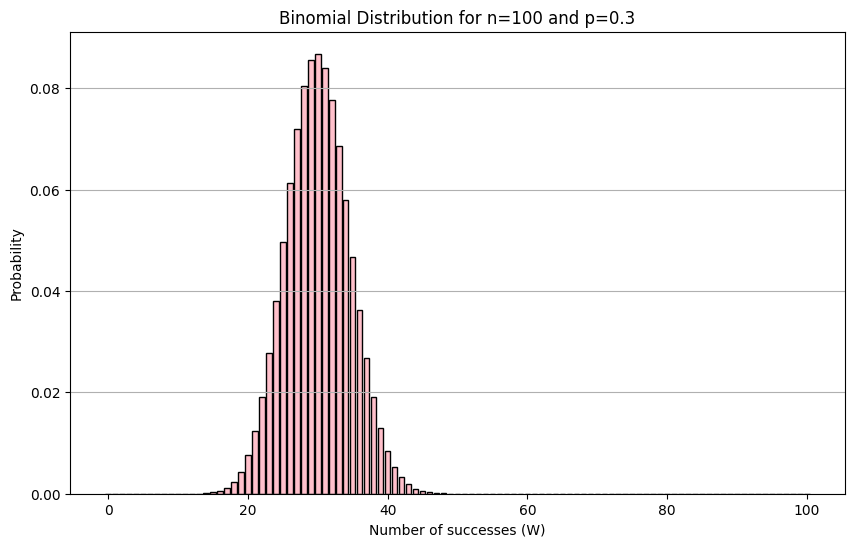

In [27]:
n = 100
p = 0.3

# Generating values for the Binomial distribution
x = np.arange(0, n+1)  # all possible numbers of successes
pmf = binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='pink', edgecolor='black')
plt.title('Binomial Distribution for n=100 and p=0.3')
plt.xlabel('Number of successes (W)')
plt.ylabel('Probability')
plt.grid(axis='y')
plt.show()

#### 5.B
State a formula for computing $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

**Solution:** The random variable $C(\omega)$ represents the count of distinct strings sharing the same number of 1s as a given string $\omega$. For a string $\omega$ with $W(\omega)=k$ ones, there are $\binom{n}{k}$ different strings of length $n$ having $k$ ones.

To find the expected value $E[C]$, we sum over all possible strings in the sample space $\Omega$, calculating $C(\omega) P(\omega)$ for each. However, since each sequence with exactly $k$ ones has the same probability $P(\omega)=p^k(1-p)^{n-k}$ and the same count $C(\omega)=\binom{n}{k}$, the summation can be simplified. We sum across all possible counts of ones, acknowledging that for each count $k$, there are $\binom{n}{k}$ strings.

Thus, the expectation $E[C]$ is calculated over all possible values of $k$, which is the number of ones in a string.

The calculation is given by:

$$E[C] = \sum_{k=0}^n \left( \binom{n}{k} \cdot \binom{n}{k} p^k(1-p)^{n-k} \right)$$

This simplifies to:

$$E[C] = \sum_{k=0}^n \binom{n}{k}^2 p^k(1-p)^{n-k}$$

This formula represents the expected count of distinct strings with the same number of 1s for all possible values of $k$ in a binomial setting.


In [28]:
def compute_E_C(p, n):
    return sum(scipy.special.comb(n, k)**2 * p**k * (1-p)**(n-k) for k in range(n+1))

In [29]:
# Values of p and n
p_values = [0.1, 0.5, 0.8]
n_values = [10, 20, 50, 100]

# Calculating E(C) for each combination of p and n
E_C_values = {(p, n): compute_E_C(p, n) for p in p_values for n in n_values}

for p in p_values:
    for n in n_values:
        result = E_C_values[(p, n)]
        result_str = f"{result:.3f}" if result > 10 else str(result)
        print(f"Experiment with p={p}, n={n}:")
        print(f"E(C) = {result_str}\n")

Experiment with p=0.1, n=10:
E(C) = 22.576

Experiment with p=0.1, n=20:
E(C) = 1757.746

Experiment with p=0.1, n=50:
E(C) = 1479309659.773

Experiment with p=0.1, n=100:
E(C) = 16815694309212342272.000

Experiment with p=0.5, n=10:
E(C) = 180.426

Experiment with p=0.5, n=20:
E(C) = 131460.694

Experiment with p=0.5, n=50:
E(C) = 89609514959900.047

Experiment with p=0.5, n=100:
E(C) = 71430183238031653288191983616.000

Experiment with p=0.8, n=10:
E(C) = 66.950

Experiment with p=0.8, n=20:
E(C) = 16979.432

Experiment with p=0.8, n=50:
E(C) = 490151964857.802

Experiment with p=0.8, n=100:
E(C) = 2013008191527897192726528.000



#### 5.C
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$.

In [30]:
def simulate_C(p, n, num_samples=1000):
    samples = np.random.binomial(1, p, (num_samples, n))
    num_ones = np.sum(samples, axis=1)
    C_values = scipy.special.comb(n, num_ones)
    return C_values

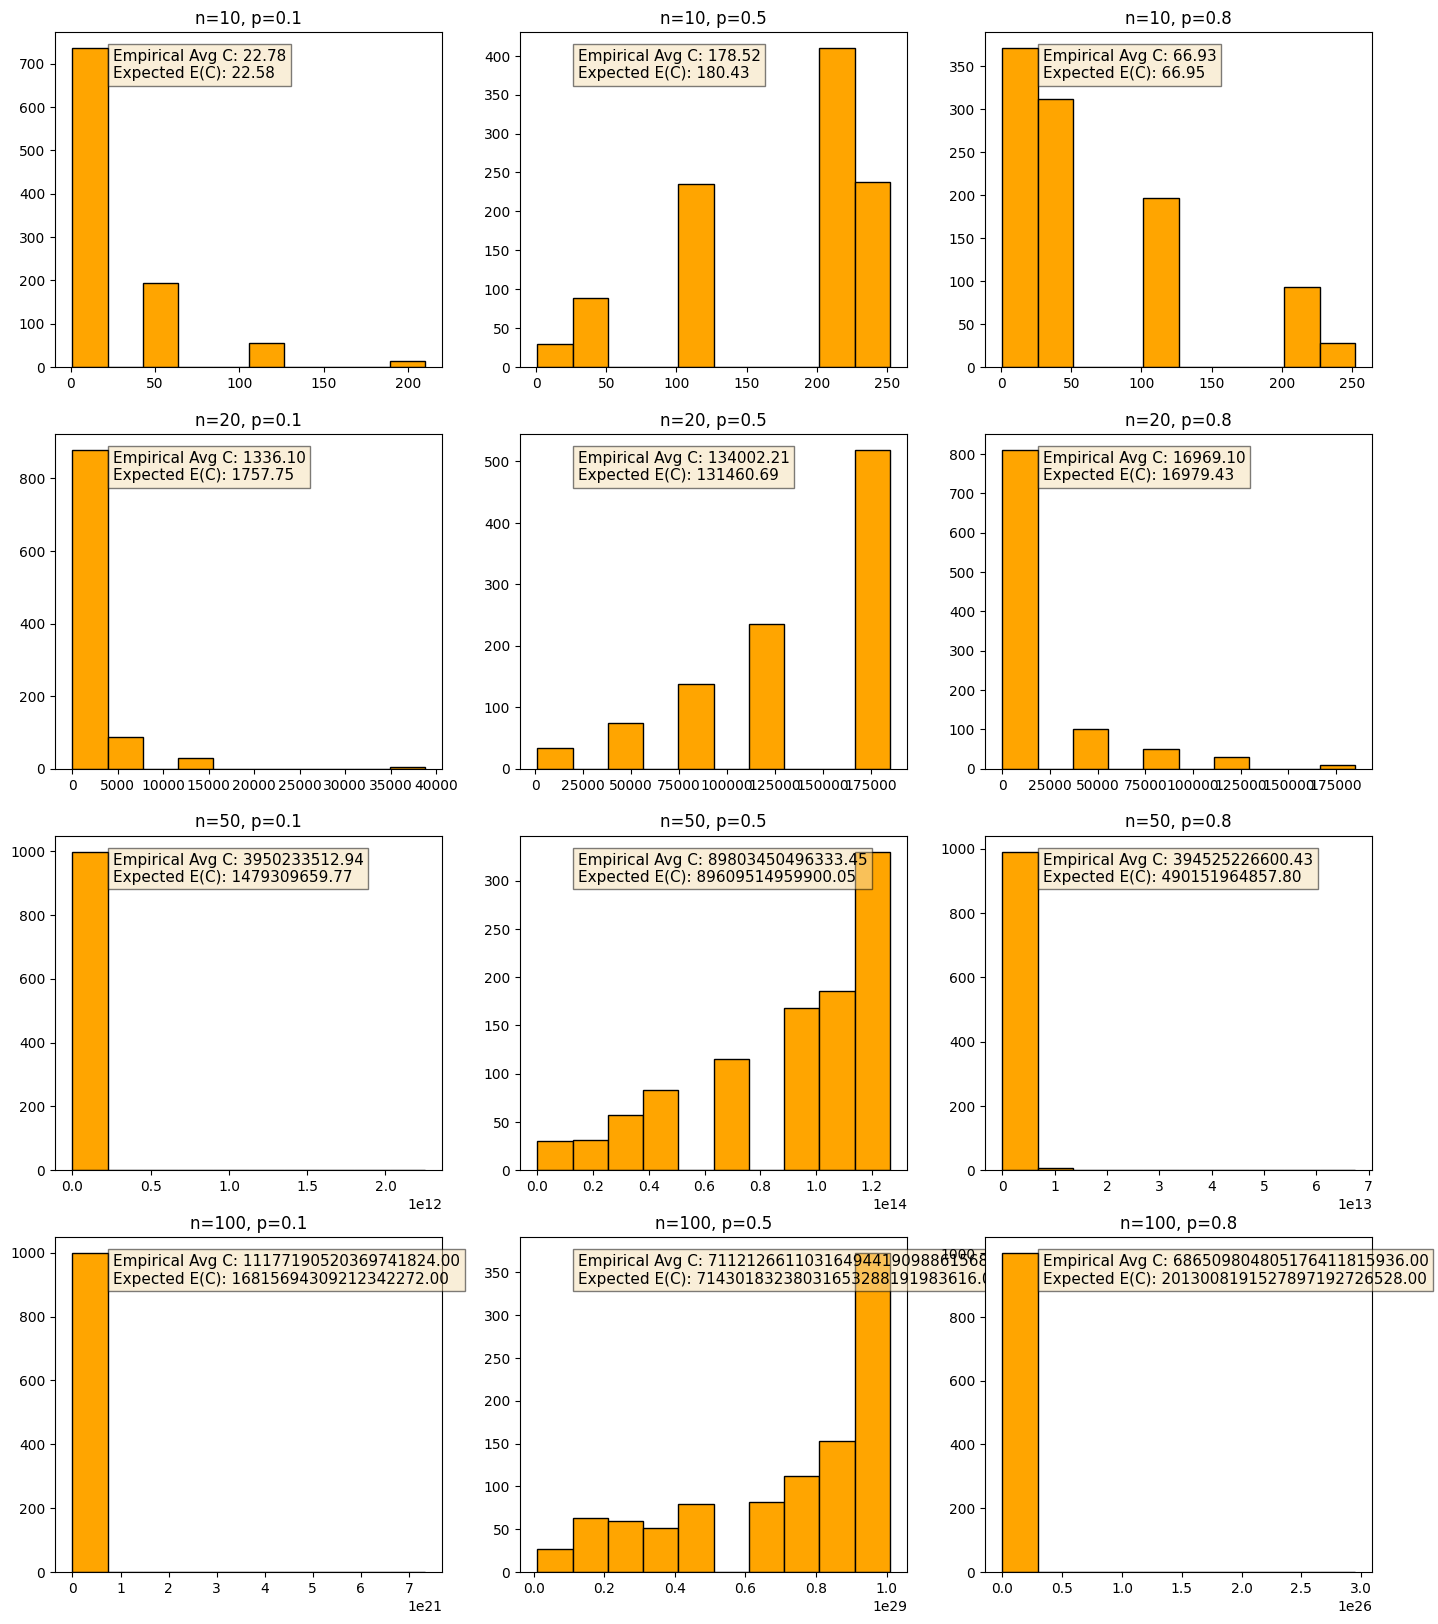

In [31]:
fig, axs = plt.subplots(4, 3, figsize=(17, 20))

calculated_means, expected_values = [], []

for n_index, n in enumerate(n_values):
    for p_index, p in enumerate(p_values):
        C_values = simulate_C(p, n)

        C_mean = np.mean(C_values)
        expected_C = E_C_values[(p, n)]

        calculated_means.append(C_mean)
        expected_values.append(expected_C)

        ax = axs[n_index, p_index]
        ax.hist(C_values, color='orange', edgecolor='black')
        ax.set_title(f"n={n}, p={p}")

        annotation_text = f"Empirical Avg C: {C_mean:.2f}\nExpected E(C): {expected_C:.2f}"
        textbox_properties = dict(boxstyle='square', facecolor='wheat', alpha=0.5)
        ax.text(0.15, 0.95, annotation_text, transform=ax.transAxes, fontsize=11,
                verticalalignment='top', bbox=textbox_properties)

plt.show()

#### 5.D
Use a scatter plot to compare the empirical and the computed values from the previous section.

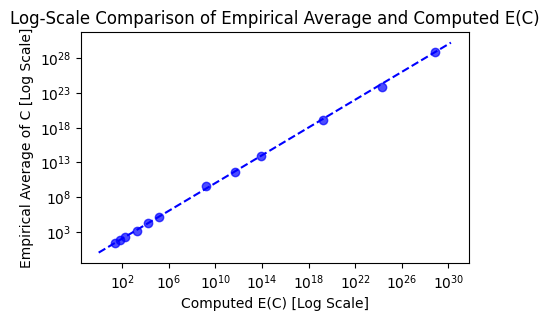

In [32]:
plt.figure(figsize=(5, 3))

plt.scatter(expected_values, calculated_means, color='blue', alpha=0.7)

plt.xscale('log')
plt.yscale('log')

x_values_for_line = np.linspace(*plt.xlim(), 100)

plt.plot(x_values_for_line, x_values_for_line, '--', color='blue', label='Perfect agreement')
plt.xlabel('Computed E(C) [Log Scale]')
plt.ylabel('Empirical Average of C [Log Scale]')
plt.title('Log-Scale Comparison of Empirical Average and Computed E(C)')
plt.show()


### Question 6 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 6.A
Write code to compute the exact value of $E(T_{N})$

###  Explanation:

Note that $(T_{N})$ ~ Geom$(p = \frac{n - i + 1}{n}).$

Therefore we have that:

*   $E(T_{N}) = \frac{1}{p}$

In [33]:
def get_p(N):
    return np.array([i / N for i in range(1, N + 1)])

In [34]:
def expected_value(N):
    p = get_p(N)
    return sum(1 / p)

#### 6.B
Write code to compute the exact value of $V(T_{N})$

###  Explanation:

Note that $(T_{N}) \sim \text{Geom}(p = \frac{n - i + 1}{n}).$

(For $i$ in the range of 1 to $n$).
Therefore, we have that:

$\text{Var}(T_{N}) = \frac{1 - p}{p^2}$

In [35]:
def variance_T(N):
    p = get_p(N)
    return sum((1 - p) / (p ** 2))

#### 6.C
Write code to exactly compute $P(T_{30}>60)$

To compute $P(T_{30}>60)$ (the probability that it takes more than 60 trials to collect a full set of 30 different coupon types), we can compute:

$P(T_{30}>60)$ = 1 - $P(T_{30} ≤ 60)$ = 1 - [$P(T_{30} = 1)$ + $P(T_{30} = 2)$ + ..... + $P(T_{30} = 60)$]

In [36]:
def exact(N, k, i, memo):
    K = np.array(range(k))
    G = scipy.stats.geom(p = i / N, loc = -1)

    if i == N:
        return G.pmf(K)

    if (i, k) in memo:
        return memo[(i, k)]

    result = np.convolve(exact(N, k, i + 1, memo), G.pmf(K))[:k - N + 1]
    memo[(i, k)] = result
    return result

In [37]:
# Compute: 𝑃(𝑇30 > 60) which is 1 - 𝑃(𝑇30 ≤ 60)
def probability_greater_than(N, k):
    # Compute the probability P(T_N <= k)
    probability_smaller_than = exact(N, k, 1, {})

    # Compute the probability P(T_N > k)
    return 1 - probability_smaller_than.sum()

In [38]:
N = 30
k = 60
result = probability_greater_than(N, k)
print(f"The probability of P(T_{N} > {k}) is: {result}")

The probability of P(T_30 > 60) is: 0.9940158432042814


#### 6.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Compute $E(S_{60})$ - the expected value of the time it will take to observe $N/2=60/2=30$ from the total of $N=60$ coupon types

In [39]:
def get_p_S(N):
    return np.array([(N - i) / N for i in range(N//2)])

In [40]:
def expected_value_S(N):
    p = get_p_S(N)
    return sum(1 / p)

In [41]:
N = 60
result = expected_value_S(N)

print(f"The expected value of E(S_{N}) is: {result}")

The expected value of E(S_60) is: 41.092996921880804


#### 6.E
Write code to exactly compute $P(S_{60}>60)$

###  Explanation:

**The Markov chain** captures the transition probabilities between states, where each state corresponds to the number of different coupons collected. The function calculates the probabilities of reaching different states after a certain number of steps (k steps).

Now, let's consider why $P(S_{60}>60)$ can be computed using the Markov chain:

The probability $P(S_{60}>60)$ represents the probability that it takes more than 60 steps to collect $\frac{N}{2} = 30$ different coupons.

This is essentially the complement of the cumulative distribution function (CDF) at i = 60 for the waiting time $P(S_{60})$.

The CDF gives the probability that the waiting time is less than or equal to a certain value.

The Markov chain, when run for k steps, provides the probabilities of reaching different states after k steps. So, by summing the probabilities of reaching states with fewer than 30 different coupons after 60 steps, you get the cumulative probability up to i = 60.

Subtracting this from 1 gives us the probability of waiting more than 60 steps.

---

**The function** probability_S_greater_than(N, k) implements a Markov chain model.

N: The total number of distinct coupons types
k: The number of steps or iterations in the Markov chain.

The function uses a transition matrix to model the Markov chain.

The transition matrix is a square matrix of size (N+1) x (N+1). The rows and columns of the matrix represent the states, where the state i corresponds to having collected i distinct coupons.

We set the diagonal elements of the matrix to probabilities corresponding to not collecting a new coupon.

We then create a boolean mask where each element is True if the corresponding element in i is less than N.

Then we set the elements to the right of the diagonal to probabilities corresponding to collecting a new coupon.

Then we multiply the initial state vector by the transition matrix raised to the power of k. This represents the state after k steps.

Finaly we return the sum of the probabilities of reaching states from 0 to N/2 (exclusive) in the final state vector.


In [42]:
def probability_S_greater_than(N, k):
    matrix = np.zeros((N + 1, N + 1))

    i = np.arange(N + 1)
    matrix[i, i] = 1 - (N - i) / N
    mask = i < N
    matrix[mask, i[mask] + 1] = (N - i[mask]) / N

    final_state = np.matmul(np.array([1] + [0] * N), np.linalg.matrix_power(matrix, k))
    return sum(final_state[0 : N//2])

In [43]:
# Example for N = 60 and k = 60
N = 60
k = 60

probability_S_greater_than = probability_S_greater_than(N, k)
print(f"The probability of P(S_{N} > {N}) is: {probability_S_greater_than}")

The probability of P(S_60 > 60) is: 0.00017216506473582955
